## Student Information
Name: 廖品捷

Student ID: 110062537

GitHub ID: https://github.com/JamesLiao714

## Overview
Welcome to another weekend hackathon, this weekend we are providing a great opportunity to the machinehackers to flex their NLP muscles again by building a fake content detection algorithm. Fake contents are everywhere from social media platforms, news platforms and there is a big list. Considering the advancement in NLP research institutes are putting a lot of sweat, blood, and tears to detect the fake content generated across the platforms.

Fake news, defined by the New York Times as “a made-up story with an intention to deceive”, often for a secondary gain, is arguably one of the most serious challenges facing the news industry today. In a December Pew Research poll, 64% of US adults said that “made-up news” has caused a “great deal of confusion” about the facts of current events
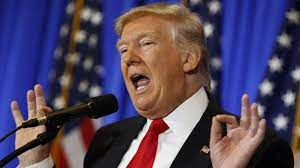

## Dataset Description:
Train.csv - 10240 rows x 3 columns (Inlcudes Labels Columns as Target)
Test.csv - 1267 rows x 2 columns
Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission
### Attribute Description:
- Text - Raw content from social media/ new platforms
- Text_Tag - Different types of content tags (9 unique products)

### Labels 
#### Represents various classes of Labels
- Half-True - 2
- False - 1
- Mostly-True - 3
- True - 5
- Barely-True - 0
- Not-Known - 4

---

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

---

## 1. Data Preparation


In [112]:
import pandas as pd
import numpy as np

In [113]:
# obtain the documents containing the categories provided

fn_train = pd.read_csv('Fake_news.csv')
print(fn_train)

       Labels                                               Text  \
0           1  Says the Annies List political group supports ...   
1           2  When did the decline of coal start? It started...   
2           3  Hillary Clinton agrees with John McCain "by vo...   
3           1  Health care reform legislation is likely to ma...   
4           2  The economic turnaround started at the end of ...   
...       ...                                                ...   
10235       3  There are a larger number of shark attacks in ...   
10236       3  Democrats have now become the party of the [At...   
10237       2  Says an alternative to Social Security that op...   
10238       1  On lifting the U.S. Cuban embargo and allowing...   
10239       4  The Department of Veterans Affairs has a manua...   

                                 Text_Tag  
0                                abortion  
1      energy,history,job-accomplishments  
2                          foreign-policy  
3      

In [114]:
tag = fn_train.Text_Tag.values
print(len(tag))

10240


Let's take at look some of the records that are contained in our subset of the data

In [115]:
fn_train.Text[0:2]

0    Says the Annies List political group supports ...
1    When did the decline of coal start? It started...
Name: Text, dtype: object

In [116]:
fn_train.Text_Tag

0                                  abortion
1        energy,history,job-accomplishments
2                            foreign-policy
3                               health-care
4                              economy,jobs
                        ...                
10235                     animals,elections
10236                             elections
10237            retirement,social-security
10238                florida,foreign-policy
10239                  health-care,veterans
Name: Text_Tag, Length: 10240, dtype: object

In [117]:
# create new columns for news' type
Type = {2 : 'Half-True',
1 : 'False',
3 : 'Mostly-True',
5 : 'True',
0 : 'Barely-True',
4 : 'Not-Known'}

fn_train['Type'] = fn_train['Labels'].apply(lambda x: Type[x])


In [118]:
# number of labels
len(fn_train.Labels)

10240

In [120]:
# using loc (by position)
fn_train.iloc[::10, 0:4][0:10]

,Labels,Text,Text_Tag,Type
0,1,Says the Annies List political group supports ...,abortion,False
10,3,"For the first time in history, the share of th...",elections,Mostly-True
20,1,Women and men both are making less when you ad...,"economy,income",False
30,5,Says Paul Ryan is still endorsing Trump.,"candidates-biography,elections,campaign-advert...",True
40,1,Says a U.S. Supreme Court justice suggested th...,"legal-issues,supreme-court",False
50,0,Says the paperback edition of Mitt Romneys boo...,"health-care,states",Barely-True
60,1,Only 2 percent of public high schools in the c...,"education,health-care",False
70,5,If you take the population growth here in Virg...,jobs,True
80,5,Says Scott Brown co-sponsored legislation to l...,"health-care,legal-issues,women",True
90,1,"Phoenix, Arizona, is the No. 2 kidnapping capi...",immigration,False


In [121]:
# new ways to access data (abortion tag)
fn_train[fn_train['Text_Tag'] == 'abortion']

,Labels,Text,Text_Tag,Type
0,1,Says the Annies List political group supports ...,abortion,False
105,5,Sen. Obama has always had a 100 percent procho...,abortion,True
332,1,Hillary Clinton supports unlimited abortion on...,abortion,False
494,3,Says Newt Gingrich made an affirmative stateme...,abortion,Mostly-True
683,3,Says a lawmaker seeks to defund Planned Parent...,abortion,Mostly-True
...,...,...,...,...
9121,5,Says abortions are decreasing.,abortion,True
9183,0,Gov. Romney's own health care plan in Massachu...,abortion,Barely-True
9669,2,Zero Planned Parenthood facilities are license...,abortion,Half-True
9838,1,Millennials are more pro-life than baby boomer...,abortion,False


---

## 2. Data Preprocessing

### Missing Values

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [122]:
fn_train.isnull()

,Labels,Text,Text_Tag,Type
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10235,False,False,False,False
10236,False,False,False,False
10237,False,False,False,False
10238,False,False,False,False


In [123]:
fn_train.isnull().apply(lambda x: dmh.check_missing_values(x))

,Labels,Text,Text_Tag,Type
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,2,0


---

In [124]:
# drop rows with null
# it's not a big deal to our data, cuz there are only two null Tax_tags
fn_train.dropna(inplace=True)

In [125]:
fn_train.isnull().apply(lambda x: dmh.check_missing_values(x))

,Labels,Text,Text_Tag,Type
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [126]:
# data number decreased from 10240 to 10238
len(fn_train)

10238

### Duplicate Data

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [127]:
fn_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10235    False
10236    False
10237    False
10238    False
10239    False
Length: 10238, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [128]:
# 8 duplicated rows were detected
sum(fn_train.duplicated())

8

In [129]:
# drop duplicated rows and keep the first one
fn_train.drop_duplicates(keep = 'first', inplace=True) 

In [130]:
# data number decreased from 10238 to 10230
len(fn_train)

10230

---

### Sampling

In [131]:
fn = fn_train
fn_sample = fn.sample(n = 1000) #random state

In [132]:
len(fn_sample)

1000

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'News type distribution'}>

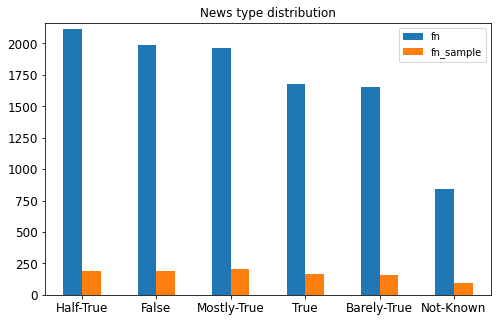

In [138]:
# Answer here

v1 = pd.DataFrame(fn.Type.value_counts())
v2 = pd.DataFrame(fn_sample.Type.value_counts())
# merge two DF on index for plotting
v3 = v1.merge(v2, left_index = True, right_index = True)
v3.rename(columns = {'Type_x': 'fn', 'Type_y': 'fn_sample'}, inplace=True)
max_y = max(v3.max()) + 50
v3.plot(kind = 'bar',
               title = 'News type distribution',
               ylim = [0, max_y], 
               rot = 0, fontsize = 12, figsize = (8,5))


###  Feature Creation

In [139]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/james/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
# takes a like a minute or two to process
fn['unigrams'] = fn['Text'].apply(lambda x: dmh.tokenize_text(x))

In [144]:
fn["unigrams"]

0        [Says, the, Annies, List, political, group, su...
1        [When, did, the, decline, of, coal, start, ?, ...
2        [Hillary, Clinton, agrees, with, John, McCain,...
3        [Health, care, reform, legislation, is, likely...
4        [The, economic, turnaround, started, at, the, ...
                               ...                        
10235    [There, are, a, larger, number, of, shark, att...
10236    [Democrats, have, now, become, the, party, of,...
10237    [Says, an, alternative, to, Social, Security, ...
10238    [On, lifting, the, U.S., Cuban, embargo, and, ...
10239    [The, Department, of, Veterans, Affairs, has, ...
Name: unigrams, Length: 10230, dtype: object

---

### Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
fn_counts = count_vect.fit_transform(fn.Text)

Now let us look at the term-document matrix we built above.

In [145]:
# We can check the shape of this matrix by:
fn_counts.shape

(10230, 12193)

In [150]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[100:120]

['17',
 '170',
 '172',
 '175',
 '176',
 '177',
 '178',
 '1789',
 '179',
 '1790',
 '1791',
 '1792',
 '1798',
 '17th',
 '18',
 '180',
 '1800s',
 '181',
 '1835',
 '184']

In [165]:
# Answer here

#remove sparse term (frequency < 5)
f_mat = pd.DataFrame(fn_counts.toarray(), columns = count_vect.get_feature_names())
print(f_mat.shape)
drop_list = []
for col in f_mat.columns:
    if max(f_mat[col]) < 5:
        drop_list.append(col)
    
f_mat.drop(drop_list, axis = 1, inplace = True)
print(f_mat.shape)


(10230, 12193)
(10230, 26)


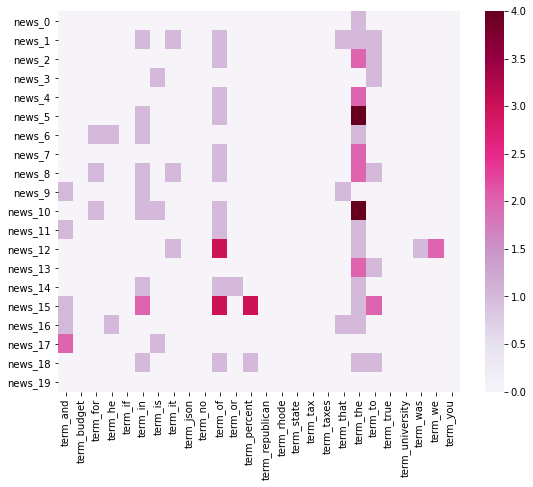

In [164]:
# draw the term-doc matrix
# Take 20 news and term for example

f_mat = f_mat[:20]
plot_x = ["term_"+str(i) for i in f_mat.columns]
plot_y = ["news_"+ str(i) for i in list(fn.index)[:20]]
plot_z = f_mat.values

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd"
                 )

---

### Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [167]:
from sklearn.decomposition import PCA

In [168]:
fn_reduced = PCA(n_components = 2).fit_transform(fn_counts.toarray())
fn_reduced.shape

(10230, 2)

In [170]:
Type = list(set(fn.Type))
print(Type)

['True', 'Not-Known', 'Mostly-True', 'Half-True', 'Barely-True', 'False']


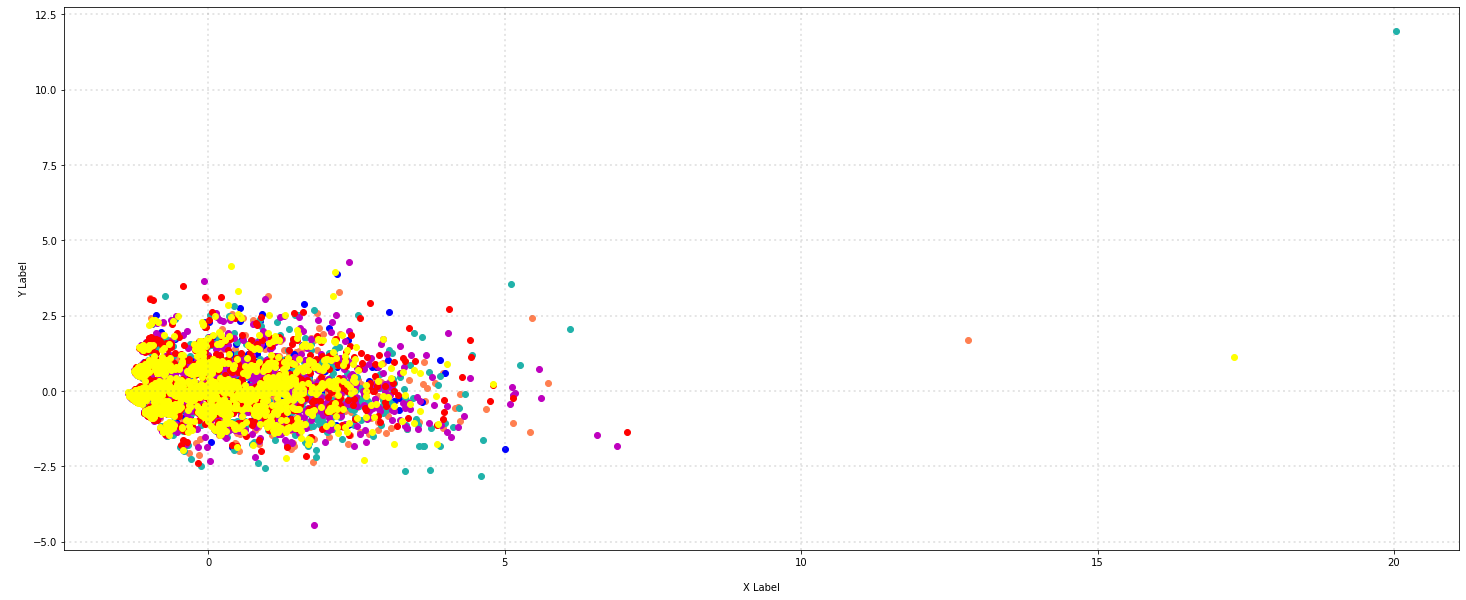

In [175]:
col = ['coral', 'blue', '#20b2aa', 'm', 'red', 'yellow']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, Type):
    xs = fn_reduced[fn['Type'] == category].T[0]
    ys = fn_reduced[fn['Type'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [172]:
# Answer here
# pca transformation
fn_reduced3 = PCA(n_components = 3).fit_transform(fn_counts.toarray())
print(fn_reduced3.shape)

(10230, 3)


ax.azim -60
ax.elev 30


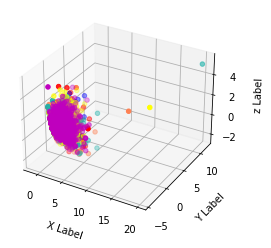

ax.azim 45
ax.elev 0


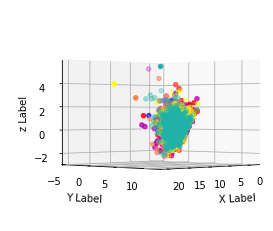

ax.azim 45
ax.elev 45


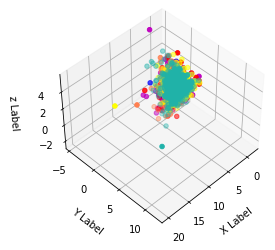

In [176]:
# plot3D
# 3 camera position
pos = [(30, -60), (0, 45), (45, 45)]
col = ['coral', 'blue', '#20b2aa', 'm', 'red', 'yellow']
for elev, azim in pos:
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for c, category in zip(col, Type):
        xs = fn_reduced3[fn['Type'] == category].T[0]
        ys = fn_reduced3[fn['Type'] == category].T[1]
        zs = fn_reduced3[fn['Type'] == category].T[2]

        ax.scatter3D(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev, azim)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nz Label')
    # show azim, elev of each plot 
    print('ax.azim {}'.format(ax.azim))
    print('ax.elev {}'.format(ax.elev))
    plt.show()

###  Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [476]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [477]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [478]:
term_frequencies[0]
term_frequencies.shape

(35788,)

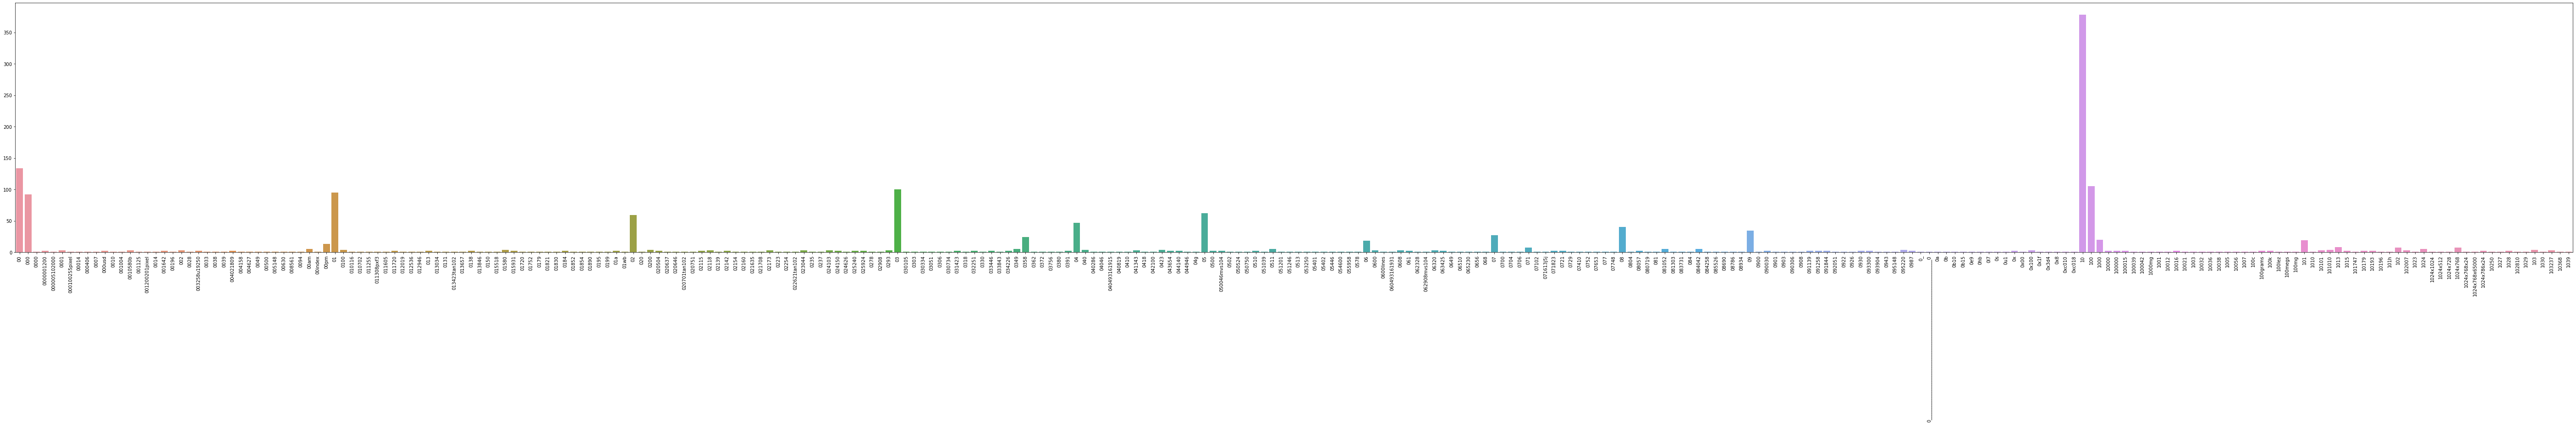

In [479]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [480]:
# Answer here
!pip install plotly
import plotly.express as px


---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [481]:
# Answer here

tf_reduce = pd.DataFrame({'term': np.array(count_vect.get_feature_names()), 'freq': term_frequencies})
# drop term's frequency < 500, 35788 to 142
tf_reduce = tf_reduce[tf_reduce['freq'] > 500]
print(tf_reduce.shape)
                          
fig = px.bar(tf_reduce, x='term', y='freq')
fig.show()


(142, 2)


---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

          x    y
242      10  378
0        00  134
243     100  105
103      03  100
37       01   95
..      ...  ...
75   020504    2
246  100000    2
245   10000    2
181    0721    2
80    02115    2

[100 rows x 2 columns]


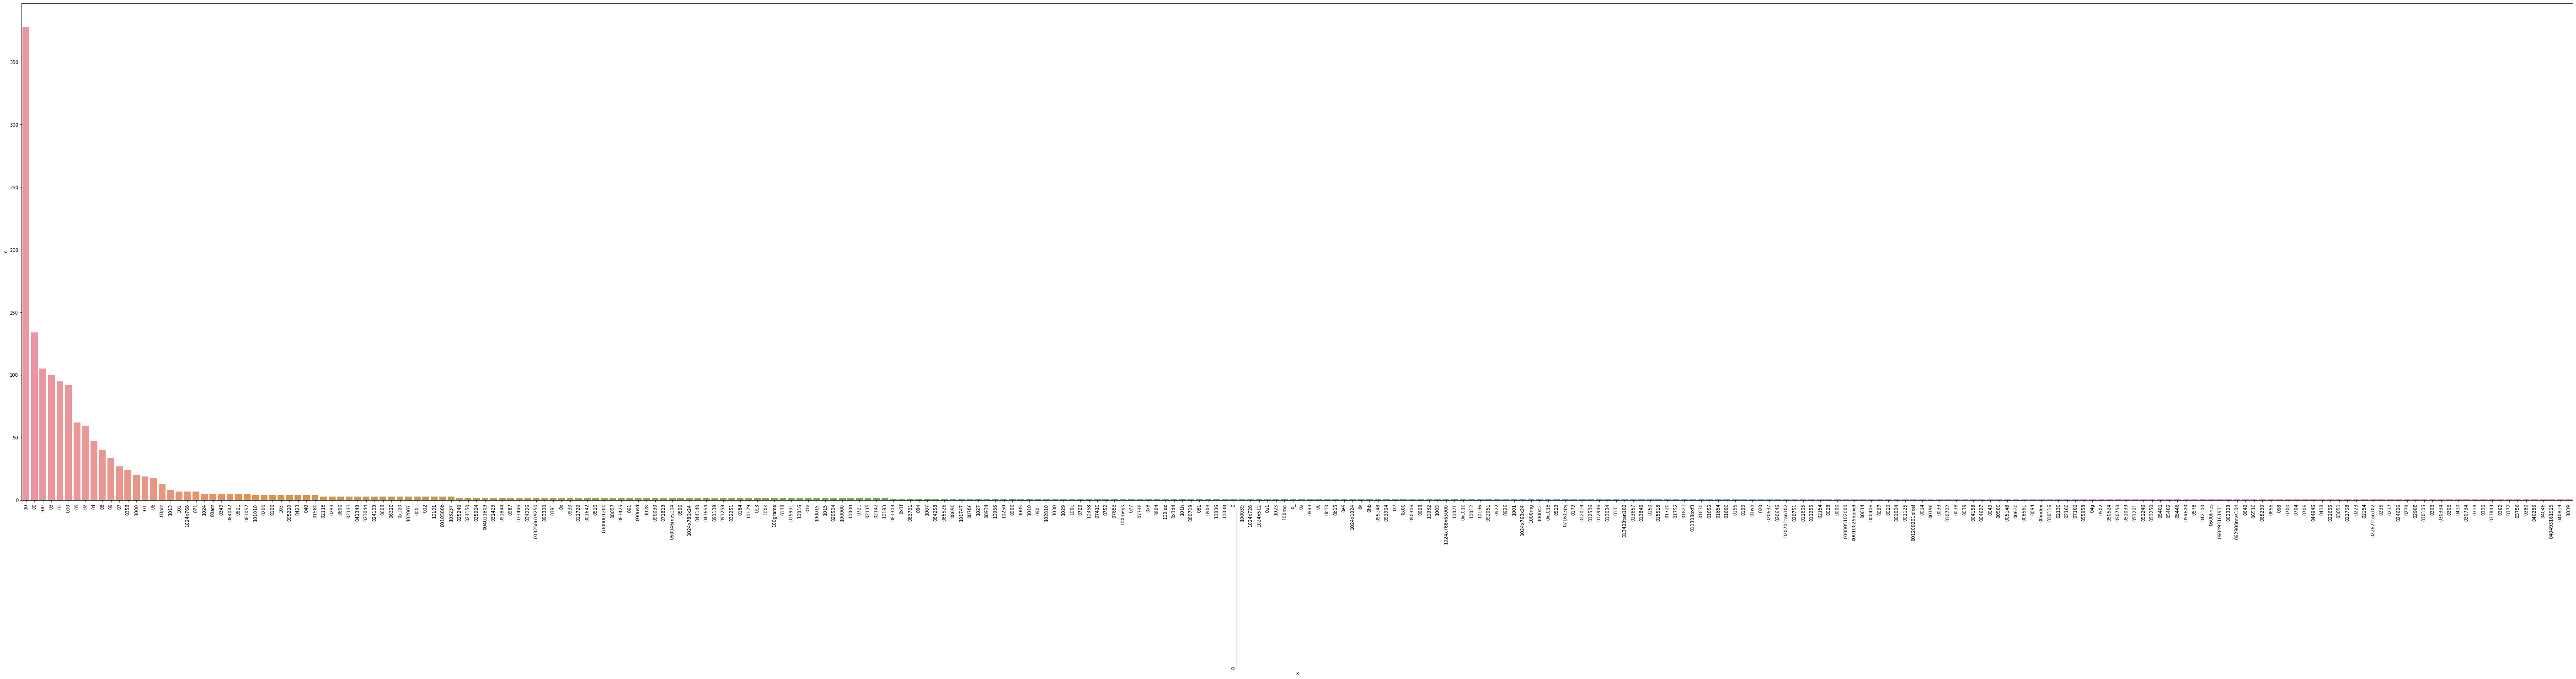

In [482]:
# Answer here
plt.subplots(figsize=(100, 20))
# create dataframe of Term Frequency
tf_df = pd.DataFrame({"x":count_vect.get_feature_names()[:300], "y": term_frequencies[:300]})
# Sort the dataframe by Frequency
tf_df = tf_df.sort_values('y', ascending = False)
print(tf_df[0:100])
#plot
g = sns.barplot(x = tf_df['x'], 
            y = tf_df['y'])
g.set_xticklabels(tf_df['x'], rotation = 90);


---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [483]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

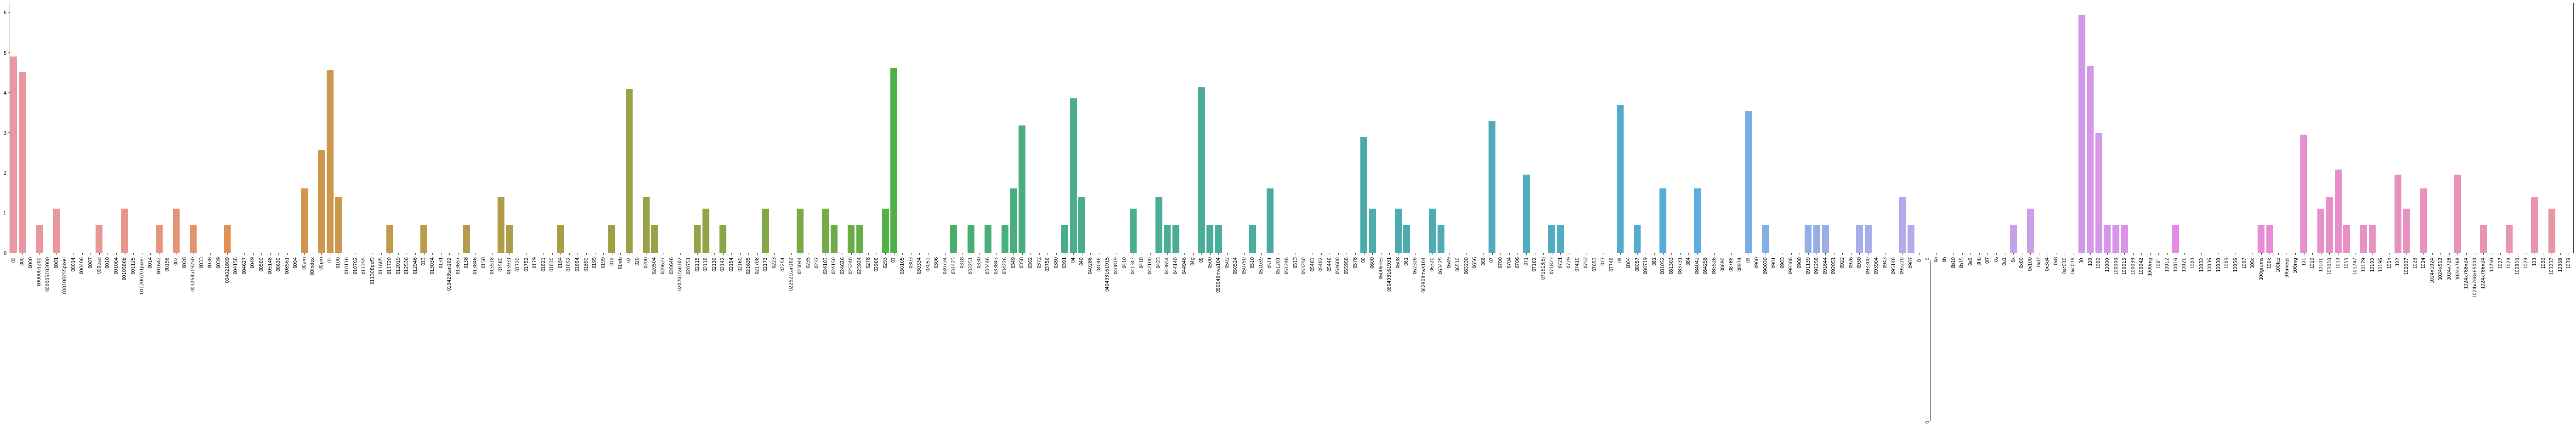

In [484]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [485]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [486]:
mlb = preprocessing.LabelBinarizer()

In [487]:
mlb.fit(X.category)

LabelBinarizer()

In [488]:
mlb.classes_

array([0, 1, 2, 3])

In [489]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [490]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [491]:
# Answer here
X_prac = X.drop('bin_category', axis = 1)

# generate the binarization using the category_name
mlb.fit(X_prac.category_name)
X_prac['bin_category'] = mlb.transform(X_prac['category_name']).tolist()
print(X_prac.loc[0:, ['category_name', 'bin_category']])
# As you see, it works


               category_name  bin_category
0              comp.graphics  [0, 1, 0, 0]
1              comp.graphics  [0, 1, 0, 0]
2     soc.religion.christian  [0, 0, 0, 1]
3     soc.religion.christian  [0, 0, 0, 1]
4     soc.religion.christian  [0, 0, 0, 1]
...                      ...           ...
2252                 sci.med  [0, 0, 1, 0]
2253                 sci.med  [0, 0, 1, 0]
2254                 sci.med  [0, 0, 1, 0]
2255                 sci.med  [0, 0, 1, 0]
2256                 sci.med  [0, 0, 1, 0]

[2257 rows x 2 columns]


---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [492]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [493]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [494]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [495]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in bthe documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

## 7. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as as Pandas and Scikit-learn. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## . References

- Pandas cook book ([Recommended for starters](http://pandas.pydata.org/pandas-docs/stable/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)